In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_squared_error

import xgboost as xgb

In [2]:
train = pd.read_csv("train.csv",index_col=0)
val = pd.read_csv("val.csv",index_col=0)
test = pd.read_csv("test.csv",index_col=0)
print(len(train), len(val), len(test))
train.head(2)

1000 250 250


,Albumin,Calcium,Immature Granulocytes,Lymphocytes,Neutrophils,Glucose,M.C.H. (Hb/Rbc),M.C.H.C. (Hb/Ht),Magnesium,Sodium,...,renal_cysts,liver_cysts,kidney_stones,bladder_stones,distended_bowels,ground_glass,temperature,risk_1,risk_2,risk_3
0,37.233024,2.381028,0.162536,1.411932,7.298400,6.621198,1.838717,20.143707,0.799493,139.225433,...,0.0,0.0,0.0,0.0,0.0,0.0,36.521381,0.0,0.0,0.0
1,40.402299,2.377734,0.180150,1.313277,8.037804,7.154653,1.839412,20.088523,0.812435,139.908419,...,1.0,1.0,0.0,0.0,0.0,0.0,35.825013,0.0,0.0,0.0


In [3]:
features_to_keep = list(train)[:-3]
print(features_to_keep)

['Albumin', 'Calcium', 'Immature Granulocytes', 'Lymphocytes', 'Neutrophils', 'Glucose', 'M.C.H. (Hb/Rbc)', 'M.C.H.C. (Hb/Ht)', 'Magnesium', 'Sodium', 'Thrombocytes', 'Urea', 'Leukocytes', 'Chloride', 'Phosphate', 'Reticulocytes', 'Segmentc. granulocytes', 'Erythroblasts', 'IL-6', 'atelectasis', 'fatty_liver', 'renal_cysts', 'liver_cysts', 'kidney_stones', 'bladder_stones', 'distended_bowels', 'ground_glass', 'temperature']


In [4]:
# combining to one single dataframe
train.reset_index(drop=True, inplace=True)
val.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

data = pd.concat( [train,val,test], axis=0) 
print(len(data))

X, Y = data.iloc[:,:-3],data.iloc[:,-1]
print(X.shape,Y.shape)

1500
(1500, 28) (1500,)


In [5]:
data_dmatrix = xgb.DMatrix(data=X,label=Y)

In [6]:
train.reset_index(drop=True, inplace=True)
val.reset_index(drop=True, inplace=True)
data = pd.concat( [train,val], axis=0) 

X_train, Y_train = data.iloc[:,:-3],data.iloc[:,-1]
print(X_train.shape, Y_train.shape)

X_test, Y_test = test.iloc[:,:-3],test.iloc[:,-1]
print(X_test.shape, Y_test.shape)

(1250, 28) (1250,)
(250, 28) (250,)


In [7]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.167, random_state=123)
# print(X_train.shape, Y_train.shape)
# print(X_test.shape, Y_test.shape)

In [8]:
xg_class = xgb.XGBClassifier(objective ='binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 10)

In [9]:
xg_class.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [10]:
preds = xg_class.predict(X_test)
preds

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
rmse = np.sqrt(mean_squared_error(Y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.536656


In [12]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

In [13]:
xg_class.fit(X, Y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

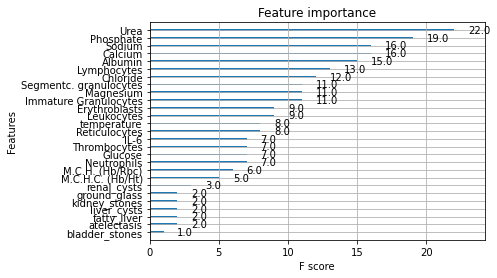

In [14]:
plot_importance(xg_class)
pyplot.show()

We have built XGBoost model for predicting the likelihood of getting heart disease and the model has 0.44 rmse.
We have also found that the most important factor in finding out the heart disease is Urea.

In [15]:
from sklearn import metrics as sk_metrics

y_test = Y_test
y_pred = preds
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2']))

Confusion Matrix

[[169  13]
 [ 59   9]]

Accuracy: 0.71

Micro Precision: 0.71
Micro Recall: 0.71
Micro F1-score: 0.71

Macro Precision: 0.58
Macro Recall: 0.53
Macro F1-score: 0.51

Weighted Precision: 0.65
Weighted Recall: 0.71
Weighted F1-score: 0.65

Classification Report

              precision    recall  f1-score   support

     Class 1       0.74      0.93      0.82       182
     Class 2       0.41      0.13      0.20        68

    accuracy                           0.71       250
   macro avg       0.58      0.53      0.51       250
weighted avg       0.65      0.71      0.65       250

